In [1]:
print ("Hello World.")

Hello World.


## Python

In [2]:
a,b = 10, 20
c = a + b
print (c)

30


### Testing other algebra functions...

In [3]:
a, b, c = 2, 3, 7
print (a*b%c)

6


### Plotting histograms

What a jump...

[7, 3, 6, 7, 9, 6, 8, 4, 9, 7]


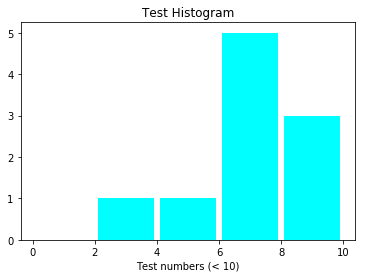

In [12]:
from matplotlib import pyplot as plt
import random

%matplotlib inline

data = []

for i in range (10):
    data.append(random.randrange(10))

print (data)

plt.hist (data, bins = range(0, 11, 2), align = 'mid', rwidth = 0.9, color = 'cyan')
plt.title ('Test Histogram')
plt.xlabel ('Test numbers (< 10)')
plt.show ()

[7, 3, 6, 7, 9, 6, 8, 4, 9, 7]


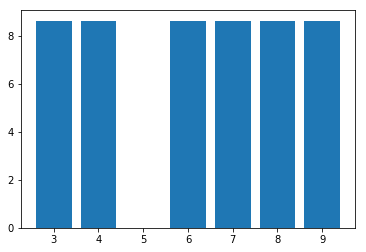

In [15]:
print (data)

plt.bar (data, 8.637789808499374)
plt.show ()

In [6]:
list1 = [1, 2, 3]
list2 = [4, 5, 6]
list3 = []
for i, j in zip (list1, list2) :
    list3.append(i+j)
print (list3)

[5, 7, 9]


In [133]:
import pandas as pd

boston = r'C:\Users\ANIMESH\Documents\Python Scripts\datasets\boston_housing.csv'
boston = pd.read_csv (boston)
cols = boston.columns
boston.head ()

,RM,LSTAT,PTRATIO,MEDV
0,6.575,4.98,15.3,504000.0
1,6.421,9.14,17.8,453600.0
2,7.185,4.03,17.8,728700.0
3,6.998,2.94,18.7,701400.0
4,7.147,5.33,18.7,760200.0


In [134]:
from pprint import pprint

print (boston.var ())

RM         4.142850e-01
LSTAT      5.015458e+01
PTRATIO    4.457450e+00
MEDV       2.733741e+10
dtype: float64


In [128]:
from sklearn.preprocessing import StandardScaler
import numpy as np

scale = StandardScaler ()

# MEDV = np.array (boston['MEDV']).reshape(-1, 1)

# scale.fit (MEDV)

# MEDV = scale.transform (MEDV)

# MEDV.reshape(-1)

# boston.iloc[:, -1] = MEDV

scale.fit (boston)
boston = scale.transform (boston)

boston = pd.DataFrame (boston, columns = cols)
boston.head ()

,RM,LSTAT,PTRATIO,MEDV
0,0.520554,-1.125077,-1.525083,0.300640
1,0.281048,-0.537070,-0.339748,-0.004498
2,1.469245,-1.259357,-0.339748,1.661047
3,1.178417,-1.413427,0.086973,1.495764
4,1.410146,-1.075605,0.086973,1.851759


RM         4.142850e-01
LSTAT      5.015458e+01
PTRATIO    4.457450e+00
MEDV       2.733741e+10
dtype: float64


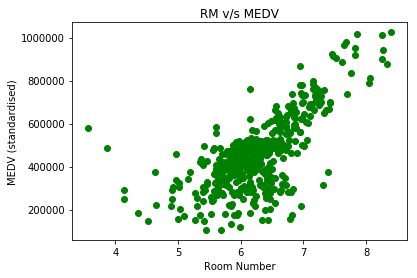

In [135]:
print (boston.var ())
from matplotlib import pyplot as plt
%matplotlib inline

X, y = boston['RM'], boston['MEDV']
plt.scatter (X, y, color = 'g')
plt.title ('RM v/s MEDV')
plt.xlabel ('Room Number')
plt.ylabel ('MEDV (standardised)')
plt.show ()

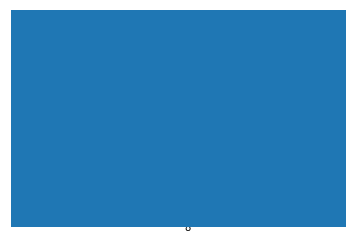

In [139]:
_3cols = boston[['RM', 'PTRATIO', 'MEDV']].values

from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure ()
ax = fig.add_subplot (111, projection = '3d')

plt.scatter (_3cols[:, 0], _3cols[:, 1], _3cols[:, 2])
plt.show ()

In [130]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

lr = LinearRegression ()

X, y = boston.loc[:, :'PTRATIO'], boston.loc[:, 'MEDV']

X_train, X_test, y_train, y_test = train_test_split (X, y, random_state = 15, test_size = 0.3)

print (X_train.shape, y_train.shape)
print (X_test.shape, y_test.shape)

lr.fit (X_train, y_train)
preds = lr.predict (X_test)
score = lr.score (X_test, y_test)

print (preds[:5])
print (y_test[:5])
print (score)

(342, 3) (342,)
(147, 3) (147,)
[-0.91920803  0.00927762 -1.09535911  0.07358085  0.80719687]
380   -1.670043
275   -0.195209
8     -0.652916
67     0.046358
337    0.364210
Name: MEDV, dtype: float64
0.727223212886


In [131]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score (lr, boston.loc[:, :'PTRATIO'], boston.loc[:, 'MEDV'], cv = 8)
print (scores, scores.mean ())

[ 0.78146008  0.64087531  0.5639302   0.5462187   0.62361632 -0.29916048
 -0.5298484   0.38041547] 0.338438400789
